# MANUELA CASTILLA RUSSO CORREA

### Para o meu projeto, foi escolhido os fatores (1)Mulheres empregadas entre a idade de 15-24. (2)A relação de meninas para homens na educação (fundamental 1 e 2) para relacionar com o Índice de Desenvolvimento Humano.

Para analisar os dados, primeiramente foi preciso juntar os dados (as tabelas). Assim, foi feito a seguinte programação: 

In [205]:
# antes de tudo foi feito import das coisas necessárias para as análises
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [206]:
#baixando todos os excels
idh = pd.read_excel('hdi_human_development_index.xlsx')
gender_edu = pd.read_excel("ratio_of_girls_to_boys_in_primary_and_secondary_education_perc.xlsx")
employment = pd.read_excel("females_aged_15_24_employment_rate_percent.xlsx")

Ao baixar os documentos, selecionei o ano que queria analisar, o ano de 2007:

In [207]:
idh_07 = idh.loc[:,["geo",2007]]
gender_edu_07 = gender_edu.loc[:,["geo",2007]]
employment_07 = employment.loc[:,["geo",2007]]

Para analisar mais facilmente os dados, juntei os dados em só um dataframe  Para isso, ajustei os index em comum de cada tabela para que os países se "colidissem".

In [208]:
#ajustando o index
idh_idx = idh_07.set_index("geo")
gender_edu_idx = gender_edu_07.set_index("geo")
employment_idx = employment_07.set_index("geo")

In [209]:
idh_idx = idh_idx.rename(index = str, columns = lambda column: "IDH in 2007")
gender_edu_idx = gender_edu_idx.rename(index = str, columns = lambda column: "Gender_edu in 2007" )
employment_idx = index = employment_idx.rename(str, columns = lambda column: "gender_employ in 2007")



Assim, iniciei o processo de join (juntar os dados):

In [210]:
#join 1.0
idh_gender = idh_idx.join(gender_edu_idx, how="inner")

In [211]:
idh_gender.head(2)

,IDH in 2007,Gender_edu in 2007
geo,,
Afghanistan,0.433,0.570
Albania,0.713,0.982


In [212]:
#join 2.0
data = idh_gender.join(employment_idx, how="inner")

In [213]:
data = data.dropna(axis=0)

In [214]:
data.head(2)

,IDH in 2007,Gender_edu in 2007,gender_employ in 2007
geo,,,
Afghanistan,0.433,0.570,28.5
Albania,0.713,0.982,31.0


Por fim, eu salvei essa nova tabela em um dataframe

In [215]:
data.to_csv("APS1: junção do employment, gender, idh de 2007.csv")
data.to_excel("APS1: junção do employment, gender, idh de 2007.xlsx")

Com isso, começa a analisar os dados.
Primeiramente fizemos o comando de correlação, para ver quanto cada fator se relaciona:

In [216]:
data.corr()

,IDH in 2007,Gender_edu in 2007,gender_employ in 2007
IDH in 2007,1.000000,0.638911,-0.195348
Gender_edu in 2007,0.638911,1.000000,-0.186105
gender_employ in 2007,-0.195348,-0.186105,1.000000


Diante desse dado, para enxergar melhor, fizemos a correlação e colocamos em um gráfico:

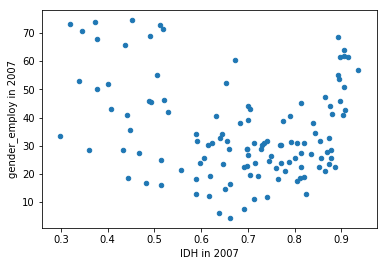

In [217]:
data.plot.scatter(x="IDH in 2007", y = "gender_employ in 2007")

Nesse gráfico, relacionando o IDH com o número de mulheres empregadas, podemos ver que existe uma relação mínima (-0.195). Assim, pode se concluir de que não existe uma relação significativa.

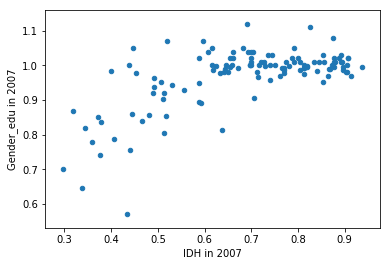

In [218]:
data.plot.scatter(x="IDH in 2007", y = "Gender_edu in 2007")

Ao contrário do primeiro gráfico, existe uma relação clara entre o IDH dos países com a quantidade de mulheres que tiveram uma educação. Assim a correlação entre este dois fatores é aproximadamente 0.64. 

Por fim, podemos observar diante do gráfico acima de que não importa a quantidade de mulher empregada, não existe uma relação clara, e pode até se dizer que não existe uma relação, ou seja, os dois fatores não são proporcionais entre si.

In [220]:
def reta(data_x, data_y):    
    a = data_y.cov(data_x) / data_x.var()
    b = data_y.mean() - a*data_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(data_x, data_y, c='red', alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('IDH em 2007')
    plt.ylabel('employment 2007')

    plt.plot((data_x.min(), data_x.max()), (a*data_x.min()+b, a*data_x.max()+b), color='blue')

    plt.tight_layout()
    plt.show()

Ajuste linear entre X3 e X4:
Coeficiente linear: 69.49370662265378
Coeficiente angular: -35.658608285692026


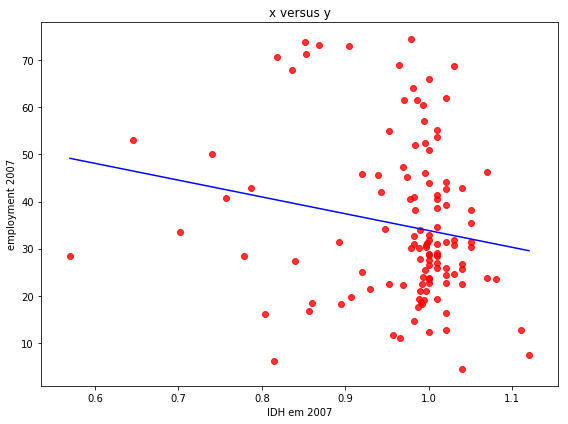

In [235]:
reta( data["Gender_edu in 2007"],data["gender_employ in 2007"] )

In [221]:
idh = pd.read_excel('hdi_human_development_index.xlsx')
gender_edu = pd.read_excel("ratio_of_girls_to_boys_in_primary_and_secondary_education_perc.xlsx")
employment = pd.read_excel("females_aged_15_24_employment_rate_percent.xlsx")

In [222]:
#ajustando o index
idh_idx1 = idh.set_index("geo")
gender_edu_idx1 = gender_edu.set_index("geo")
employment_idx1 = employment.set_index("geo")

In [223]:
anos = np.arange(2005, 2011)

IDH_cut = idh_idx1.loc[:, anos]
gender_cut = gender_edu_idx1.loc[:, anos]
employment_cut = employment_idx1.loc[:, anos]
IDH_cut

/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """
/anaconda3/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,2005,2006,2007,2008,2009,2010
geo,,,,,,
Afghanistan,0.405,0.415,0.433,0.434,0.448,0.454
Albania,0.696,0.703,0.713,0.721,0.725,0.738
Algeria,0.686,0.690,0.697,0.705,0.714,0.724
Andorra,NaN,NaN,NaN,NaN,NaN,0.819
Angola,0.439,0.454,0.468,0.480,0.488,0.495
Antigua and Barbuda,0.773,0.781,0.786,0.788,0.783,0.782
Argentina,0.782,0.788,0.792,0.794,0.802,0.816
Armenia,0.692,0.707,0.721,0.725,0.720,0.729
Australia,0.915,0.918,0.921,0.925,0.927,0.927


In [229]:
idh_r = IDH_cut.rename(index = str, columns = lambda column: "IDH in" + str(column))
gender_edu_r = gender_cut.rename(index = str, columns = lambda column: "Gender_edu in" +str(column) )
employment_r = employment_cut.rename(index = str, columns = lambda column: "gender_employ in " +str(column))

In [225]:
x = idh_r.join(gender_edu_r)
union = x.join(employment_r)

In [226]:
#union1 = union.dropna(axis=0)

In [227]:
def tudo(anoI, anoF, nomeX, nomeY, data_set, titulo, label_x, label_y):
    lista = np.arange(anoI, anoF+1)
    fig = plt.figure(figsize=(16,12))
    
    for d in lista:
        dados_x = data_set[nomeX+ str(d)]
        dados_y = data_set[nomeY+str(d)]
        
        a = dados_y.cov(dados_x) / dados_x.var()
        b = dados_y.mean() - a*dados_x.mean()
        
        plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
        plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')


    
    plt.title('x versus y')
    plt.xlabel('IDH em 2007')
    plt.ylabel('employment 2007')


    plt.tight_layout()
    plt.show()

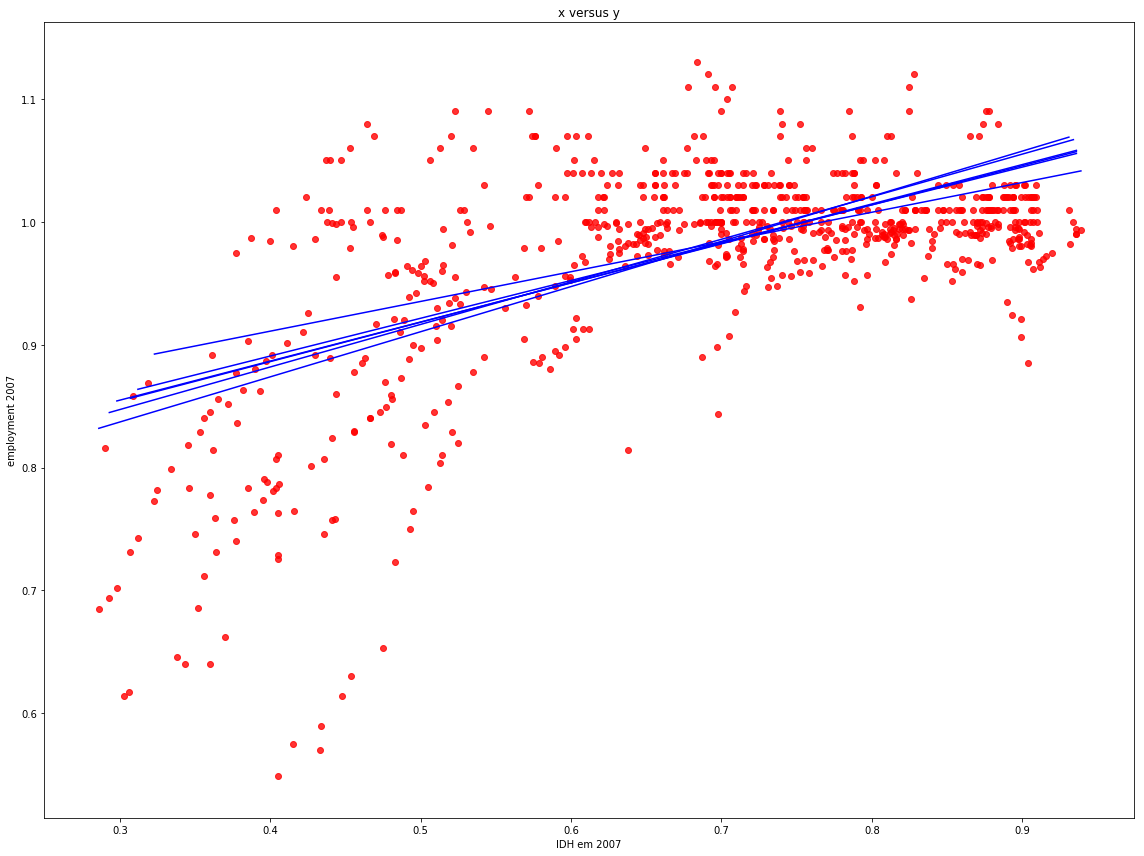

In [230]:
tudo(2005, 2010, "IDH in", "Gender_edu in", union, "idh por gender nos anos ", "IDH", "edu gender")

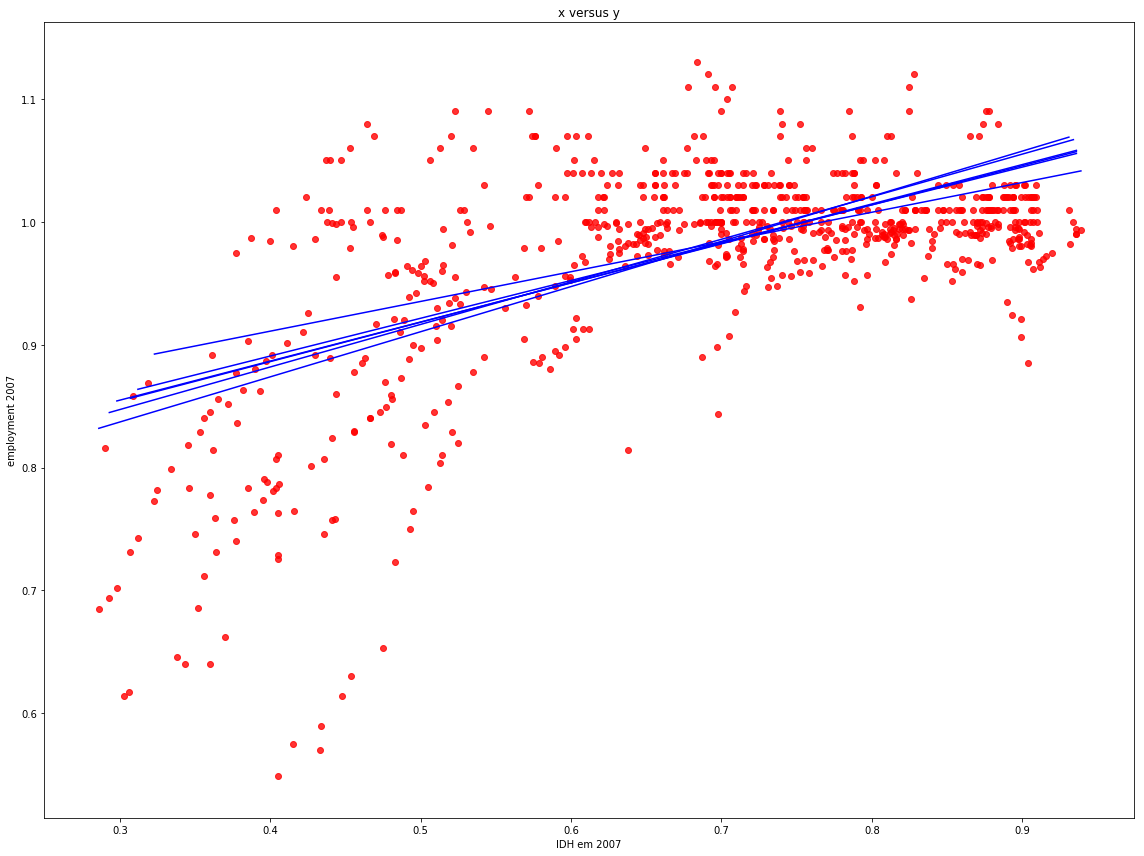

In [231]:
tudo(2005, 2010, "IDH in", "Gender_edu in", union, "gender_employ in ", "IDH", "edu gender")